# Insurance Claims Project

## Set Up

In [ ]:
# Import necessary libraries
import numpy as np
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
import time

# Data Preprocessing


In [ ]:
# remove column _c39 as it contains only null values
df = df.drop(['_c39'], axis = 1)

In [ ]:
# Replace ? with NaN
df = df.replace('?', np.nan)

# Separate columns into Quantitative and Categorical
quantitative_cols = df.select_dtypes(include='number').columns
print("Quantitative Columns:\n", quantitative_cols)

categorical_cols = df.select_dtypes(include='object').columns
print("\nCategorical Columns:\n", categorical_cols)

Quantitative Columns:
 Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

Categorical Columns:
 Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')


In [ ]:
# Print unique values for categorical columns
for column in categorical_cols:
  if column == 'policy_bind_date': # skip policy bind date, not important to know the unique values
    continue
  else:
    unique_values = df[column].unique()
    print(f"Unique '{column}': {unique_values}")
print('-'*100)
# Print min max for quantitative columns
for column in quantitative_cols:
    max_values = df[column].max()
    min_values = df[column].min()
    print(f"Column '{column}': Min = {min_values}, Max = {max_values}")

Unique 'policy_state': ['OH' 'IN' 'IL']
Unique 'policy_csl': ['250/500' '100/300' '500/1000']
Unique 'insured_sex': ['MALE' 'FEMALE']
Unique 'insured_education_level': ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
Unique 'insured_occupation': ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
Unique 'insured_hobbies': ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
Unique 'insured_relationship': ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
Unique 'incident_date': ['2015-01-25' '2015-01-21' '2015-02-22' '2015-01-10' '2015-02-17'
 '2015-01-02' '2015-01-13' '2015-02-27' '2015-01-30

In [ ]:
# To make policy_bind_date & incident_date more meaningful, we will take the difference between the 2 dates
df["incident_minus_policy_bind_date"] = (pd.to_datetime(df["incident_date"])-pd.to_datetime(df["policy_bind_date"])).dt.days

In [ ]:
print(df.isnull().sum())

months_as_customer                   0
age                                  0
policy_number                        0
policy_bind_date                     0
policy_state                         0
policy_csl                           0
policy_deductable                    0
policy_annual_premium                0
umbrella_limit                       0
insured_zip                          0
insured_sex                          0
insured_education_level              0
insured_occupation                   0
insured_hobbies                      0
insured_relationship                 0
capital-gains                        0
capital-loss                         0
incident_date                        0
incident_type                        0
collision_type                     178
incident_severity                    0
authorities_contacted               91
incident_state                       0
incident_city                        0
incident_location                    0
incident_hour_of_the_day 

In [ ]:
# Imputate NaN values

fill_values = {
    'collision_type': df['collision_type'].mode()[0],  # Mode for collision_type
    'property_damage': 'NO',  # Fill 'NO' for property_damage
    'police_report_available': 'NO',  # Fill 'NO' for police_report_available
    'authorities_contacted': 'Other'  # Fill 'others' for authorities_contacted
}

# Apply the fillna operation for all columns in the dictionary
df.fillna(value=fill_values, inplace=True)

# Verify the changes
print(df.isna().sum())

months_as_customer                 0
age                                0
policy_number                      0
policy_bind_date                   0
policy_state                       0
policy_csl                         0
policy_deductable                  0
policy_annual_premium              0
umbrella_limit                     0
insured_zip                        0
insured_sex                        0
insured_education_level            0
insured_occupation                 0
insured_hobbies                    0
insured_relationship               0
capital-gains                      0
capital-loss                       0
incident_date                      0
incident_type                      0
collision_type                     0
incident_severity                  0
authorities_contacted              0
incident_state                     0
incident_city                      0
incident_location                  0
incident_hour_of_the_day           0
number_of_vehicles_involved        0
p

fraud_reported
N    753
Y    247
Name: count, dtype: int64


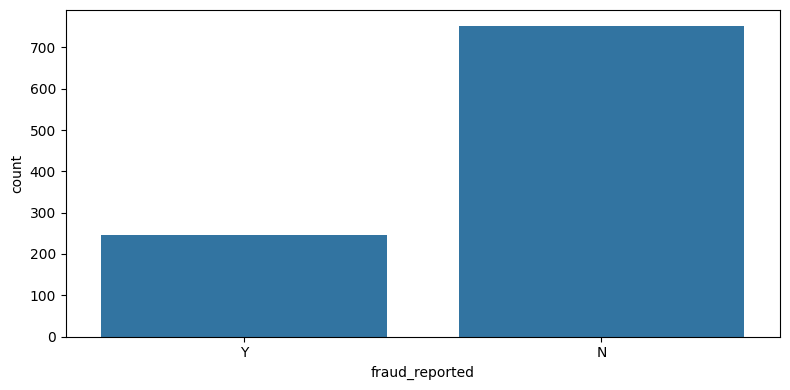

In [ ]:
# To visualize distribution of fraud/non-fraud claims
print(df['fraud_reported'].value_counts())

plt.figure(figsize=(8, 4))
sns.countplot(x='fraud_reported', data=df)
plt.tight_layout()
plt.show()

The visualization above suggests that the dataset is quite imbalanced, therefore it may require sampling methods like SMOTE.

**Age Analysis**

In [ ]:
df['age'].describe()

,age
count,1000.000000
mean,38.948000
std,9.140287
min,19.000000
25%,32.000000
50%,38.000000
75%,44.000000
max,64.000000


In [ ]:
# Segment age into different age groups to better discover patterns

bins = list(range(15,66,5))

labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65']

df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_range'] = df['age_range'].astype(str)



fraud_counts = df.groupby('age_range')['fraud_reported'].value_counts().unstack().fillna(0)
fraud_counts.columns = ['Non-Fraud', 'Fraud']
fraud_counts = fraud_counts.reset_index()

print(fraud_counts)

  age_range  Non-Fraud  Fraud
0     15-20        0.0    1.0
1     21-25       18.0    7.0
2     26-30       97.0   32.0
3     31-35      149.0   56.0
4     36-40      155.0   40.0
5     41-45      148.0   48.0
6     46-50       97.0   25.0
7     51-55       36.0   13.0
8     56-60       35.0   16.0
9     61-65       18.0    9.0


<Figure size 800x400 with 0 Axes>

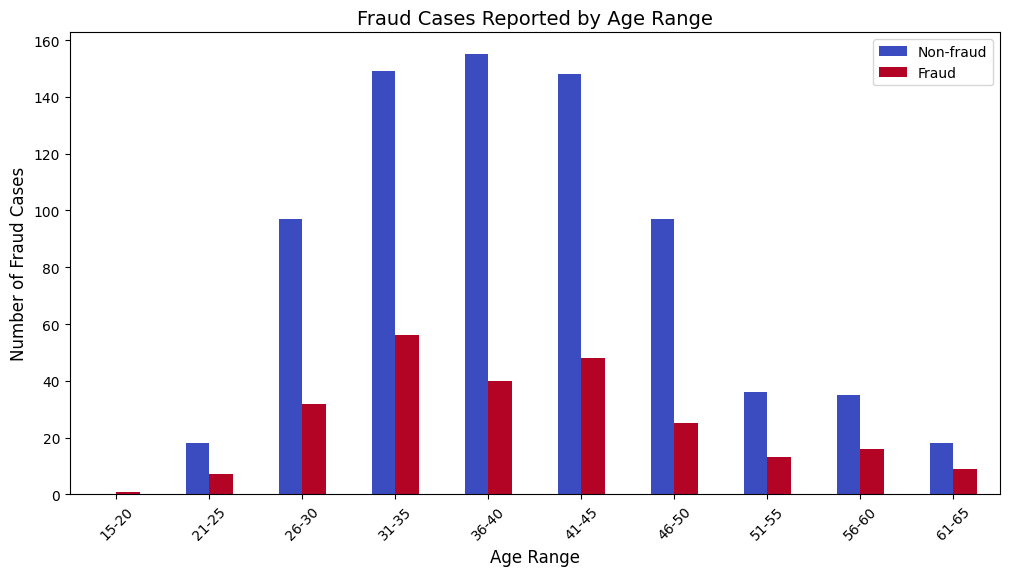

In [ ]:
# to plot fraud/non-fraud according to age_range
plt.figure(figsize=(8, 4))
fraud_counts.set_index('age_range').plot(kind='bar', stacked=False, figsize=(12,6), colormap='coolwarm')

plt.xlabel('Age Range', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.title('Fraud Cases Reported by Age Range', fontsize=14)
plt.legend(['Non-fraud','Fraud'])
plt.xticks(rotation=45)
plt.show()

We can see that people in the age range from 35-40 has the most number of  frauds followed by 41-45.

In [ ]:
df['months_as_customer'].describe()

,months_as_customer
count,1000.000000
mean,203.954000
std,115.113174
min,0.000000
25%,115.750000
50%,199.500000
75%,276.250000
max,479.000000


In [ ]:
# Segment months_as_customer into different groups to better discover patterns

bins = list(range(0, 481,60))

labels = ['0-60', '61-120', '121-180', '181-240', '241-300', '301-360', '361-420', '421-480']

df['months_as_customer_range'] = pd.cut(df['months_as_customer'], bins=bins, labels=labels, right=False)
df['months_as_customer_range'] = df['months_as_customer_range'].astype(str)
df['months_as_customer_range'] = pd.Categorical(df['months_as_customer_range'], categories=labels, ordered=True)


fraud_counts = df.groupby('months_as_customer_range')['fraud_reported'].value_counts().unstack().fillna(0)
fraud_counts.columns = ['Non-Fraud', 'Fraud']
fraud_counts = fraud_counts.reset_index()

print(fraud_counts)

  months_as_customer_range  Non-Fraud  Fraud
0                     0-60         76     25
1                   61-120        117     41
2                  121-180        143     45
3                  181-240        133     41
4                  241-300        163     45
5                  301-360         44     16
6                  361-420         34     17
7                  421-480         43     17


<ipython-input-300-e629e273b000>:12: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 800x400 with 0 Axes>

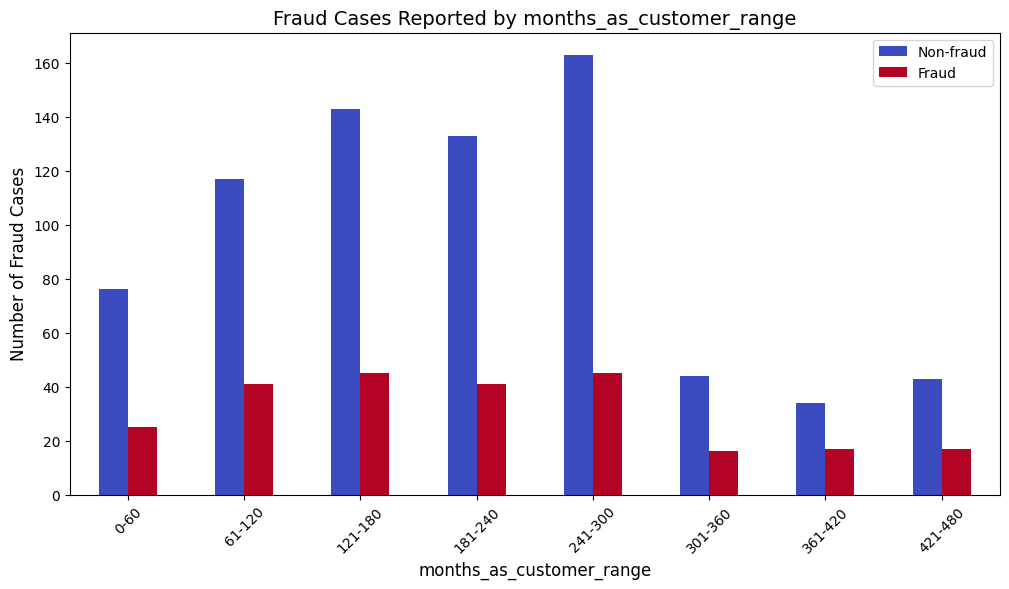

In [ ]:
# to plot fraud/non-fraud according to age_range
plt.figure(figsize=(8, 4))
fraud_counts.set_index('months_as_customer_range').plot(kind='bar', stacked=False, figsize=(12,6), colormap='coolwarm')

plt.xlabel('months_as_customer_range', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.title('Fraud Cases Reported by months_as_customer_range', fontsize=14)
plt.legend(['Non-fraud','Fraud'])
plt.xticks(rotation=45)
plt.show()

We can see that fraud claims are more prevalant when months_as_customer < 300.

In [ ]:
# convert months_as_customer_range back to object
df['months_as_customer_range'] = df['months_as_customer_range'].astype('object')

<Figure size 800x400 with 0 Axes>

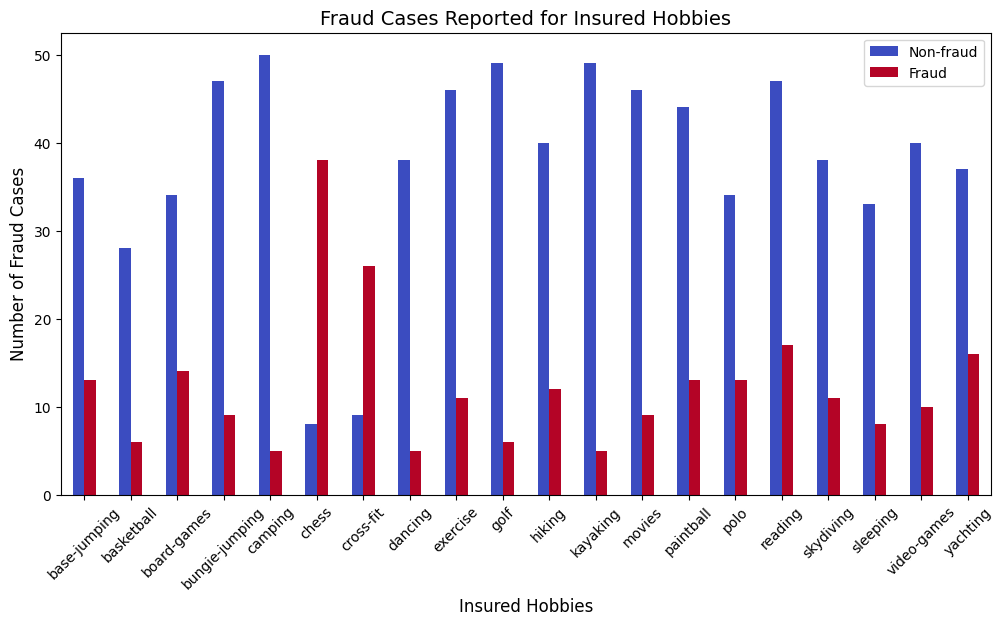

In [ ]:
# to plot fraud/non-fraud according to insured_hobbies
fraud_hobbies = df.groupby('insured_hobbies')['fraud_reported'].value_counts().unstack().fillna(0)
fraud_hobbies.columns = ['Non-Fraud', 'Fraud']
fraud_hobbies = fraud_hobbies.reset_index()

plt.figure(figsize=(8, 4))
fraud_hobbies.set_index('insured_hobbies').plot(kind='bar', stacked=False, figsize=(12,6), colormap='coolwarm')

plt.xlabel('Insured Hobbies', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.title('Fraud Cases Reported for Insured Hobbies', fontsize=14)
plt.legend(['Non-fraud','Fraud'])
plt.xticks(rotation=45)
plt.show()


An interesting insight is people that has chess as insured hobbies and cross-fit has significantly higher number of fraud reported compared to the rest.

To reduce redundancy, we will only keep cross-fit and chess and rename the other hobbies as 'others'.

In [ ]:
df['insured_hobbies'] = df['insured_hobbies'].apply(lambda x: x if x == 'chess' or x == 'cross-fit' else 'others')

<Figure size 800x400 with 0 Axes>

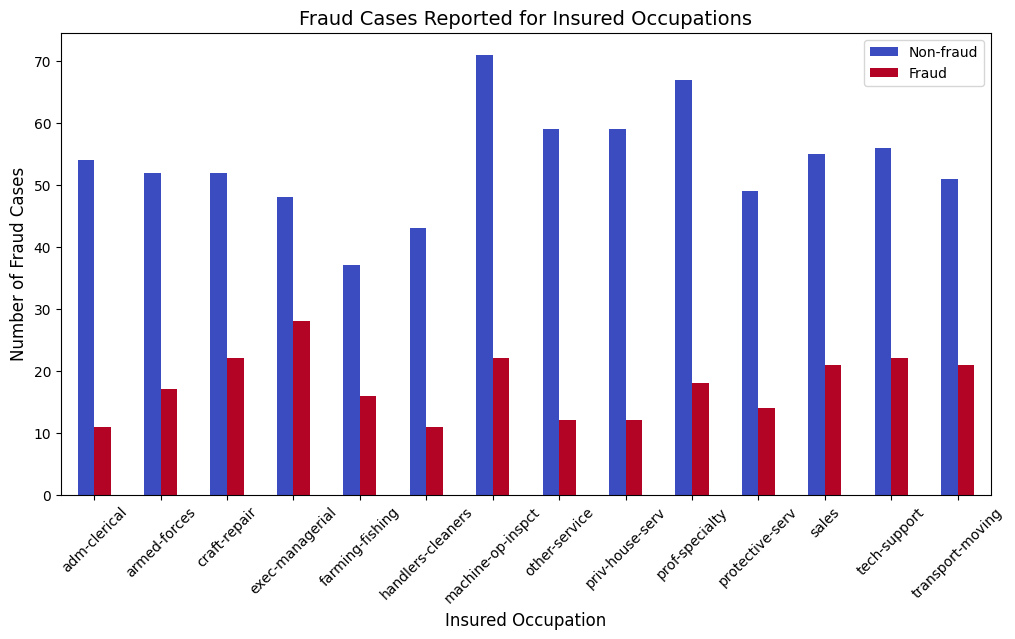

In [ ]:
# to plot fruad/non-fraud according to insured_occupations
fraud_occupations = df.groupby('insured_occupation')['fraud_reported'].value_counts().unstack().fillna(0)
fraud_occupations.columns = ['Non-Fraud', 'Fraud']
fraud_occupations = fraud_occupations.reset_index()

plt.figure(figsize=(8, 4))
fraud_occupations.set_index('insured_occupation').plot(kind='bar', stacked=False, figsize=(12,6), colormap='coolwarm')

plt.xlabel('Insured Occupation', fontsize=12)
plt.ylabel('Number of Fraud Cases', fontsize=12)
plt.title('Fraud Cases Reported for Insured Occupations', fontsize=14)
plt.legend(['Non-fraud','Fraud'])
plt.xticks(rotation=45)
plt.show()

People in exec-managerial has more frauds committed than other occupations.

In [ ]:
# Get lon lat of states
geolocator = Nominatim(user_agent="geoapi", timeout=200)
states =  df['incident_state'].unique()  # state names
locations = {}

for state in states:
    location = geolocator.geocode(state + ", USA")
    if location:
        locations[state] = (location.latitude, location.longitude)
    time.sleep(1)

print(locations)

{'SC': (33.6874388, -80.4363743), 'VA': (37.1232245, -78.4927721), 'NY': (43.1561681, -75.8449946), 'OH': (40.2253569, -82.6881395), 'WV': (38.4758406, -80.8408415), 'NC': (35.6729639, -79.0392919), 'PA': (40.9699889, -77.7278831)}


In [ ]:
import plotly.express as px

state_counts = df["incident_state"].value_counts().reset_index()
state_counts.columns = ["state", "count"]

state_data = {
    "state": df['incident_state'].unique(),
    "value": locations.values(),  # lat, lon
}

fig = px.choropleth(state_counts,locations='state',
                     locationmode="USA-states",
                     color='count',
                     scope="usa",
                     color_continuous_scale="Reds",
                     title="State-wise Incident Count")

# Update layout to set figure size
fig.update_layout(
    width=800,
    height=600,
)

fig.show()

Hovering over the visualisation, we can see that the state with the highest incident count is NY (New York) followed by SC (South Carolina).

plotted by sweeen, find me if any problem 😆

In [ ]:
# count the fraud cases at each state instead
fraud_cases = df[df['fraud_reported'] == 'Y']
fraud_cases['incident_state'].value_counts()

state_counts = fraud_cases['incident_state'].value_counts().reset_index()
state_counts.columns = ["state", "count"]

state_data = {
    "state": df['incident_state'].unique(),
    "value": locations.values(),  # lat, lon
}

fig = px.choropleth(state_counts,locations='state',
                     locationmode="USA-states",
                     color='count',
                     scope="usa",
                     color_continuous_scale="Reds",
                     title="State-wise Fraud Cases Count")

# Update layout to set figure size
fig.update_layout(
    width=800,
    height=600,
)

fig.show()

From this choropleth map, we can see that SC has the highest fraud count instead followed by NY even though SC has slightly lower incident count compared to NY.

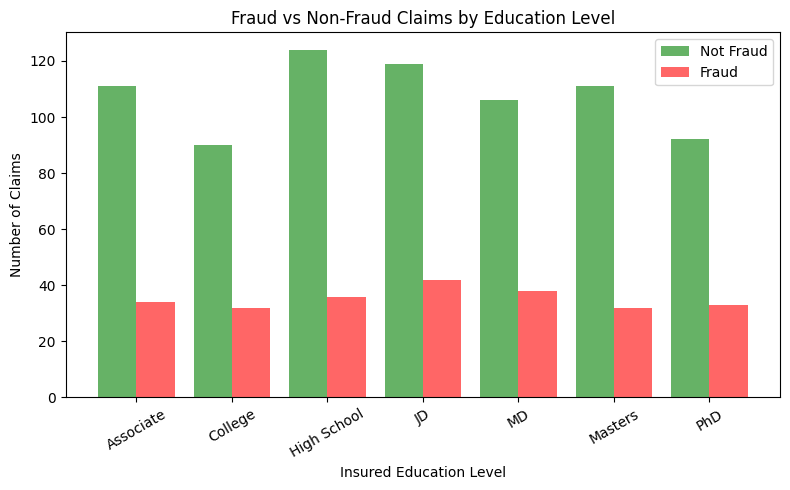

In [ ]:
# plot count of fraud/non-fraud claims against insured_education_level
fraud_counts = df[df['fraud_reported'] == 'Y']['insured_education_level'].value_counts()
non_fraud_counts = df[df['fraud_reported'] == 'N']['insured_education_level'].value_counts()

education_levels = sorted(df['insured_education_level'].unique())

bar_width = 0.4
x = range(len(education_levels))

plt.bar(x, non_fraud_counts.reindex(education_levels, fill_value=0),
        width=bar_width, color='green', label='Not Fraud', alpha=0.6)
plt.bar([i + bar_width for i in x], fraud_counts.reindex(education_levels, fill_value=0),
        width=bar_width, color='red', label='Fraud', alpha=0.6)

plt.xticks([i + bar_width/2 for i in x], education_levels, rotation=30)
plt.xlabel('Insured Education Level')
plt.ylabel('Number of Claims')
plt.title('Fraud vs Non-Fraud Claims by Education Level')
plt.legend()
plt.tight_layout()
plt.show()

From the chart above, we can see that the number of fraud/non-fraud claims are quite well distributed among the different insured education level.

fraud_reported     N    Y
property_damage          
NO               529  169
YES              224   78


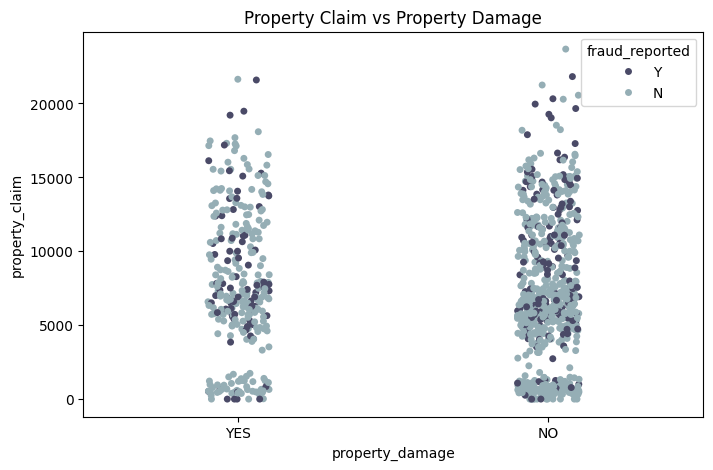

In [ ]:
# Plot to visualize Property Type vs Vehicle Claim
fraud_counts = df.groupby(['property_damage', 'fraud_reported']).size().unstack(fill_value=0)
print(fraud_counts)

plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(x=df['property_damage'], y=df['property_claim'], hue=df['fraud_reported'], palette='bone')
plt.title('Property Claim vs Property Damage')
plt.show()

Fraud cases are more common when property damage is reported as 'YES' 78/302 = approx 25.8% as compared to when property damage is reported as 'NO' 169/698 = approx 19.5%. However, amount of fraud claims when property damage is reported as 'YES' is still more than when property damage is reported as 'NO'.

<ipython-input-311-65a892bd0012>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




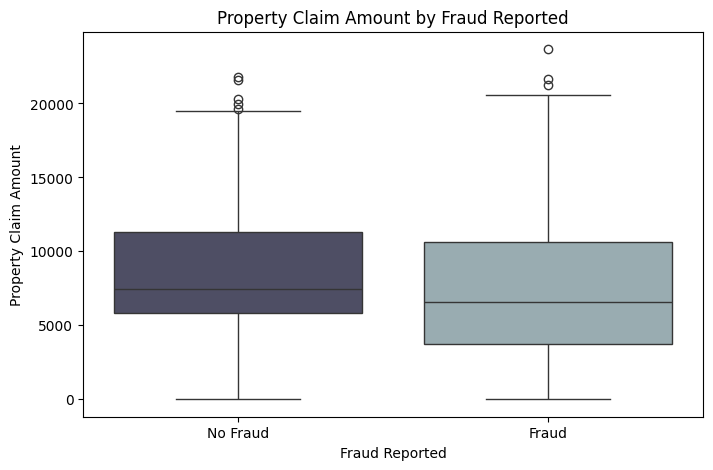

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxplot(x=df['fraud_reported'], y=df['property_claim'], palette='bone')

plt.title('Property Claim Amount by Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Property Claim Amount')
plt.xticks([0, 1], ['No Fraud', 'Fraud'])
plt.show()

The boxplot above shows that both fraud and non-fraud cases have clusters at lower claim values, with some high-value outliers, therefore following a similar distribution.

fraud_reported              N    Y
incident_type                     
Multi-vehicle Collision   305  114
Parked Car                 76    8
Single Vehicle Collision  286  117
Vehicle Theft              86    8


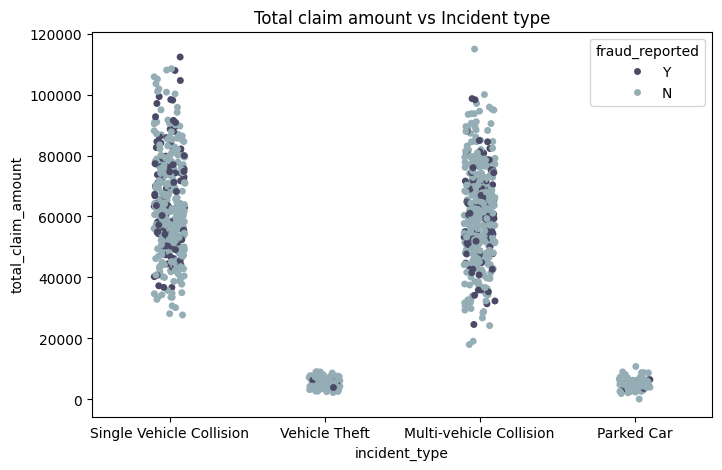

In [ ]:
# Plot to visualize Total claim amount vs Incident type
fraud_counts = df.groupby(['incident_type', 'fraud_reported']).size().unstack(fill_value=0)
print(fraud_counts)

plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(x=df['incident_type'], y=df['total_claim_amount'], hue=df['fraud_reported'], palette='bone')
plt.title('Total claim amount vs Incident type')
plt.show()

We can see that for each incident_type, fraud claims and non-fraud claims follows a similar claim distribution. However, there seems to be a larger percentage of fraud claims happening when the incident involves vehicle collision.

<ipython-input-313-3356566117c7>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




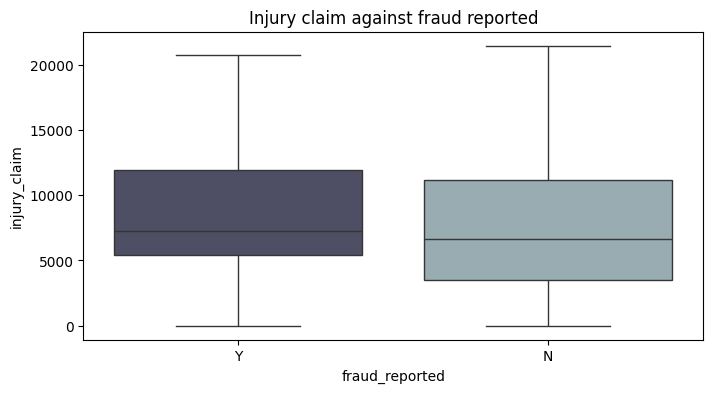

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fraud_reported'], y=df['injury_claim'], palette='bone')
plt.title('Injury claim against fraud reported')
plt.show()

Fraud cases have a slightly higher median injury claim, suggesting that fraudulent claims often involve larger compensation requests.

<ipython-input-12-95cf339bd5d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['fraud_reported'], y=df['total_claim_amount'], palette='bone')


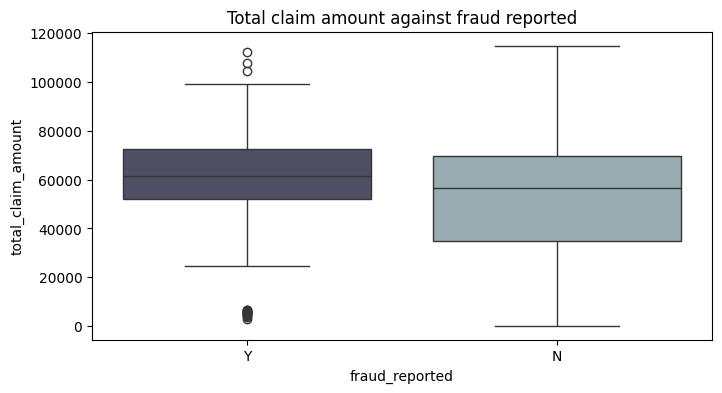

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fraud_reported'], y=df['total_claim_amount'], palette='bone')
plt.title('Total claim amount against fraud reported')
plt.show()

We can see that the median for fraud claims is slightly higher compared to non-fraud claims, with outliers being both extremely high and extremely low claim amounts. This indicates that fraudsters may either inflate damages significantly (resulting in high-value claims) or fabricate small damages (resulting in low-value claims to avoid detection).



fraud_reported     N   Y
bodily_injuries         
0                260  80
1                251  77
2                242  90


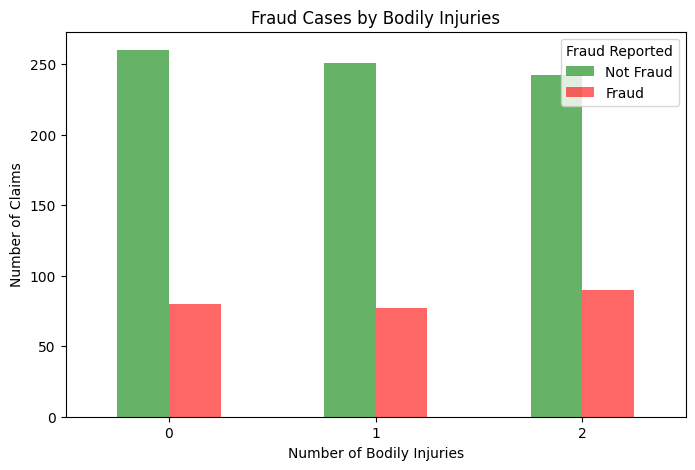

In [ ]:
fraud_counts = df.groupby(['bodily_injuries', 'fraud_reported']).size().unstack(fill_value=0)
print(fraud_counts)

fraud_counts = df.groupby(['bodily_injuries', 'fraud_reported']).size().unstack(fill_value=0)
fraud_counts.plot(kind='bar', figsize=(8, 5), color=['green', 'red'], alpha=0.6)

plt.title('Fraud Cases by Bodily Injuries')
plt.xlabel('Number of Bodily Injuries')
plt.ylabel('Number of Claims')
plt.legend(title='Fraud Reported', labels=['Not Fraud', 'Fraud'])
plt.xticks(rotation=0)
plt.show()

We can see that fraud claims are quite well distributed despite the number of bodily injuries with bodily injuries = 2 being slightly higher.

fraud_reported           N   Y
authorities_contacted         
Ambulance              139  57
Fire                   163  60
Other                  220  69
Police                 231  61
----------------------------------------------------------------------------------------------------
fraud_reported         Fraud_Percentage
authorities_contacted                  
Ambulance                     29.081633
Fire                          26.905830
Other                         23.875433
Police                        20.890411


<Figure size 1000x600 with 0 Axes>

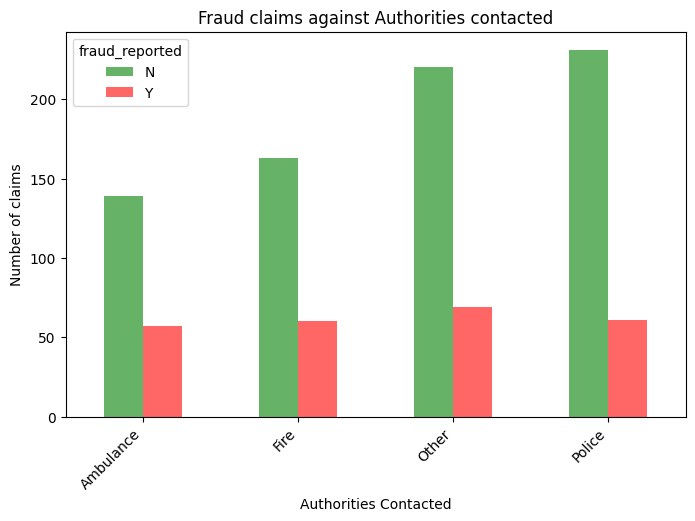

In [ ]:
fraud_counts = df.groupby(['authorities_contacted', 'fraud_reported']).size().unstack(fill_value=0)
print(fraud_counts)
print('-'*100)
fraud_counts['Fraud_Percentage'] = (fraud_counts['Y'] / (fraud_counts['N'] + fraud_counts['Y'])) * 100
print(fraud_counts[['Fraud_Percentage']])

plt.figure(figsize=(10, 6))
fraud_counts = df.groupby(['authorities_contacted', 'fraud_reported']).size().unstack(fill_value=0)
fraud_counts.plot(kind='bar', figsize=(8, 5), color=['green', 'red'], alpha=0.6)

plt.title('Fraud claims against Authorities contacted')
plt.xlabel('Authorities Contacted')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of claims')
plt.legend(title='fraud_reported')
plt.show()

The number of fraud claims remains consistent, regardless of the authorities contacted. However, there appears to be a higher percentage of fraud claims when emergency services like ambulance or fire fighters are involved. This could suggest that incidents requiring such authorities tend to be of a larger scale and may present more opportunities for fraudulent activity.

fraud_reported   N   Y
auto_year             
1995            43  13
1996            23  14
1997            34  12
1998            33   7
1999            45  10
2000            31  11
2001            33   9
2002            39  10
2003            42   9
2004            23  16
2005            42  12
2006            39  14
2007            34  18
2008            35  10
2009            39  11
2010            43   7
2011            36  17
2012            37   9
2013            34  15
2014            32  12
2015            36  11


<Figure size 1000x600 with 0 Axes>

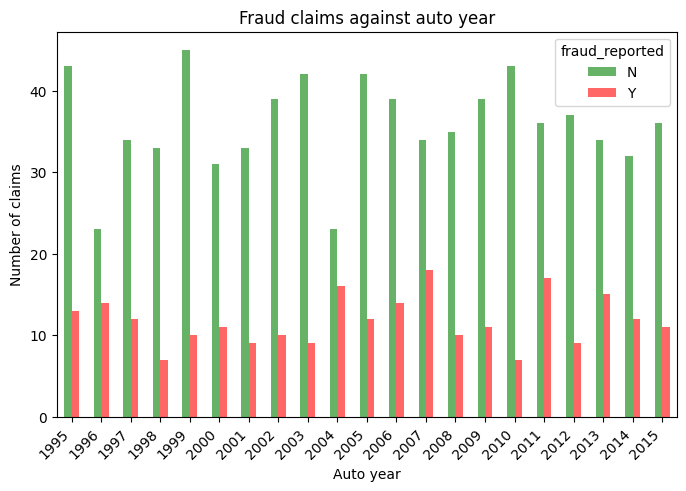

In [ ]:
fraud_counts = df.groupby(['auto_year', 'fraud_reported']).size().unstack(fill_value=0)
print(fraud_counts)

plt.figure(figsize=(10, 6))
fraud_counts = df.groupby(['auto_year', 'fraud_reported']).size().unstack(fill_value=0)
fraud_counts.plot(kind='bar', figsize=(8, 5), color=['green', 'red'], alpha=0.6)

plt.title('Fraud claims against auto year')
plt.xlabel('Auto year')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of claims')
plt.legend(title='fraud_reported')
plt.show()

The number of fraud claims varies year over year.

fraud_reported   N   Y
auto_make             
Accura          55  13
Audi            48  21
BMW             52  20
Chevrolet       55  21
Dodge           60  20
Ford            50  22
Honda           41  14
Jeep            56  11
Mercedes        43  22
Nissan          64  14
Saab            62  18
Suburu          61  19
Toyota          57  13
Volkswagen      49  19
----------------------------------------------------------------------------------------------------
fraud_reported  Fraud_Percentage
auto_make                       
Accura                 19.117647
Audi                   30.434783
BMW                    27.777778
Chevrolet              27.631579
Dodge                  25.000000
Ford                   30.555556
Honda                  25.454545
Jeep                   16.417910
Mercedes               33.846154
Nissan                 17.948718
Saab                   22.500000
Suburu                 23.750000
Toyota                 18.571429
Volkswagen             27.941176


<Figure size 1000x600 with 0 Axes>

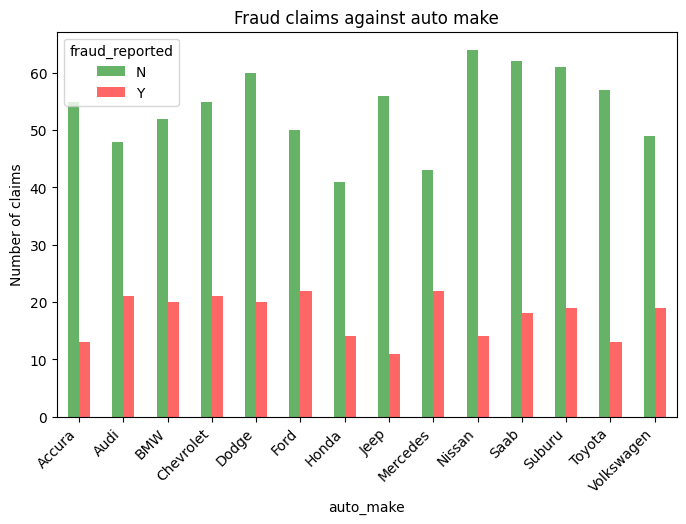

In [ ]:
fraud_counts = df.groupby(['auto_make', 'fraud_reported']).size().unstack(fill_value=0)
print(fraud_counts)
print('-'*100)
fraud_counts['Fraud_Percentage'] = (fraud_counts['Y'] / (fraud_counts['N'] + fraud_counts['Y'])) * 100
print(fraud_counts[['Fraud_Percentage']])

plt.figure(figsize=(10, 6))
fraud_counts = df.groupby(['auto_make', 'fraud_reported']).size().unstack(fill_value=0)
fraud_counts.plot(kind='bar', figsize=(8, 5), color=['green', 'red'], alpha=0.6)

plt.title('Fraud claims against auto make')
plt.xlabel('auto_make')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of claims')
plt.legend(title='fraud_reported')
plt.show()

Car brands like Audi, Mercedes and Ford have a higher fraud rate as compared to the other brands.

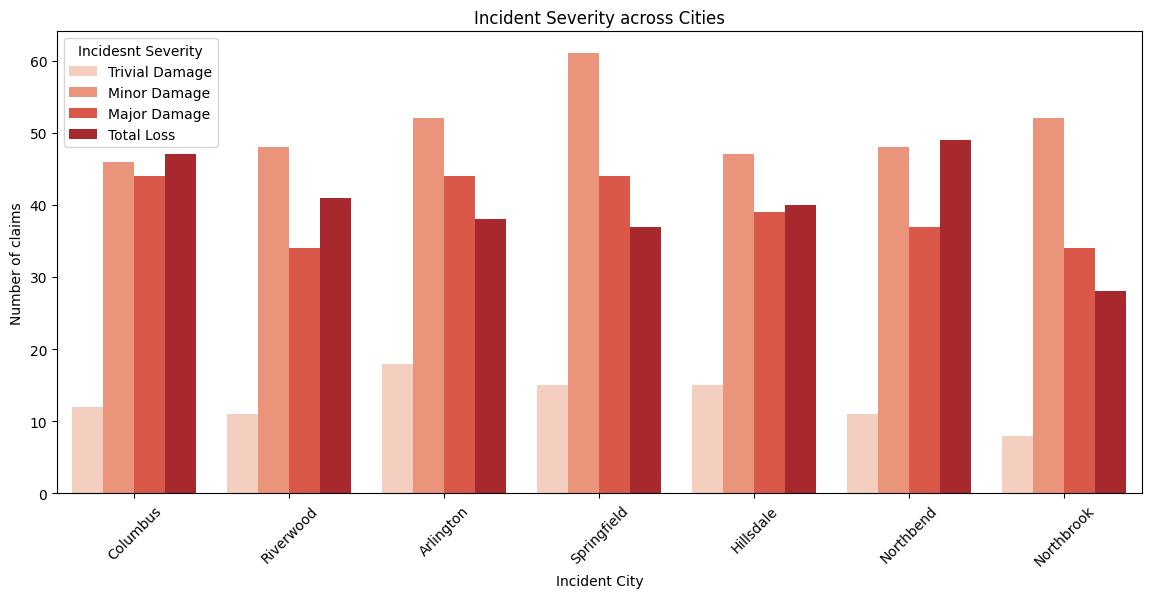

In [ ]:
order = ['Trivial Damage','Minor Damage','Major Damage','Total Loss']

df['incident_severity'] = pd.Categorical(df['incident_severity'], categories=order, ordered=True)

plt.figure(figsize=(14, 6))
sns.countplot(x=df['incident_city'], hue=df['incident_severity'], palette='Reds')
plt.xticks(rotation=45)
plt.title('Incident Severity across Cities')
plt.xlabel('Incident City')
plt.ylabel('Number of claims')
plt.legend(title='Incidesnt Severity')
plt.show()

Claims for minor damage incidents are typically more common across all cities compared to those for other levels of incident severity.

In [ ]:
minor_damage_claims = df[df['incident_severity'] == 'Trivial Damage']
fraud_non_fraud_counts = minor_damage_claims['fraud_reported'].value_counts()
fraud_percentage = (fraud_non_fraud_counts.get(1, 0) / fraud_non_fraud_counts.sum()) * 100

print(fraud_non_fraud_counts)
print(f"Percentage of fraud claims: {fraud_percentage:.2f}%")

fraud_reported
N    84
Y     6
Name: count, dtype: int64
Percentage of fraud claims: 6.67%


<ipython-input-320-0b8ff368a038>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
minor_damage_claims = df[df['incident_severity'] == 'Minor Damage']
fraud_non_fraud_counts = minor_damage_claims['fraud_reported'].value_counts()
fraud_percentage = (fraud_non_fraud_counts.get(1, 0) / fraud_non_fraud_counts.sum()) * 100

print(fraud_non_fraud_counts)
print(f"Percentage of fraud claims: {fraud_percentage:.2f}%")

fraud_reported
N    316
Y     38
Name: count, dtype: int64
Percentage of fraud claims: 10.73%


<ipython-input-321-9763635f416b>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
minor_damage_claims = df[df['incident_severity'] == 'Major Damage']
fraud_non_fraud_counts = minor_damage_claims['fraud_reported'].value_counts()
fraud_percentage = (fraud_non_fraud_counts.get(1, 0) / fraud_non_fraud_counts.sum()) * 100

print(fraud_non_fraud_counts)
print(f"Percentage of fraud claims: {fraud_percentage:.2f}%")

fraud_reported
Y    167
N    109
Name: count, dtype: int64
Percentage of fraud claims: 39.49%


<ipython-input-322-1a86d59c4385>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [ ]:
minor_damage_claims = df[df['incident_severity'] == 'Total Loss']
fraud_non_fraud_counts = minor_damage_claims['fraud_reported'].value_counts()
fraud_percentage = (fraud_non_fraud_counts.get(1, 0) / fraud_non_fraud_counts.sum()) * 100

print(fraud_non_fraud_counts)
print(f"Percentage of fraud claims: {fraud_percentage:.2f}%")

fraud_reported
N    244
Y     36
Name: count, dtype: int64
Percentage of fraud claims: 12.86%


<ipython-input-323-3fb15ec3919f>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



However, it is interesting how incident severity with Major Damage has a very large percentage of fraud claims as compared to the other incident severity.

fraud_reported             N   Y
incident_hour_of_the_day        
0                         40  12
1                         21   8
2                         21  10
3                         41  12
4                         38   8
5                         24   9
6                         30  14
7                         32   8
8                         30   6
9                         39   4
10                        31  15
11                        18  12
12                        32   8
13                        38   8
14                        28  15
15                        26  13
16                        33  16
17                        46   8
18                        27  14
19                        31   9
20                        25   9
21                        32  10
22                        33   5
23                        37  14


<Figure size 1000x600 with 0 Axes>

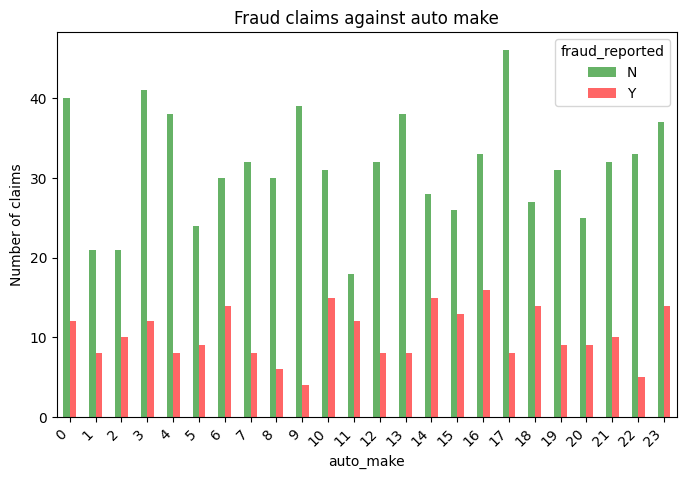

In [ ]:
fraud_counts = df.groupby(['incident_hour_of_the_day', 'fraud_reported']).size().unstack(fill_value=0)
print(fraud_counts)

plt.figure(figsize=(10, 6))
fraud_counts = df.groupby(['incident_hour_of_the_day', 'fraud_reported']).size().unstack(fill_value=0)
fraud_counts.plot(kind='bar', figsize=(8, 5), color=['green', 'red'], alpha=0.6)

plt.title('Fraud claims against auto make')
plt.xlabel('auto_make')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of claims')
plt.legend(title='fraud_reported')
plt.show()

Fraud claims is inconsistent throughout the day.

fraud_reported         N    Y
incident_month_year          
2015-01              381  135
2015-02              364  108
2015-03                8    4


<Figure size 1000x600 with 0 Axes>

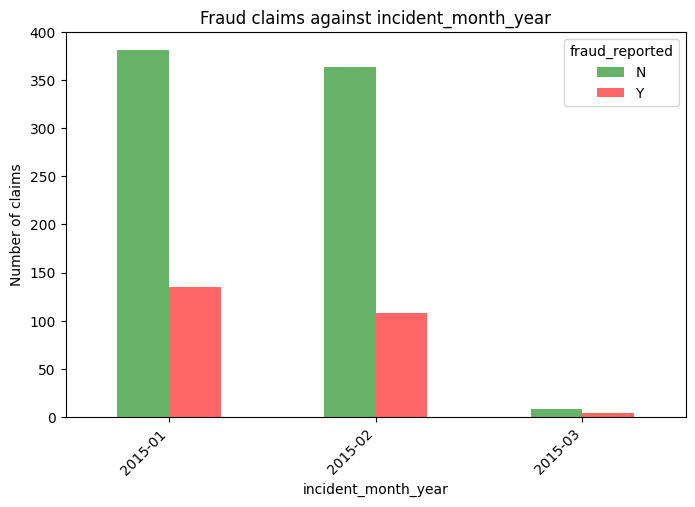

In [ ]:
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_month_year'] = df['incident_date'].dt.to_period('M')
fraud_counts = df.groupby(['incident_month_year', 'fraud_reported']).size().unstack(fill_value=0)
print(fraud_counts)

plt.figure(figsize=(10, 6))
fraud_counts = df.groupby(['incident_month_year', 'fraud_reported']).size().unstack(fill_value=0)
fraud_counts.plot(kind='bar', figsize=(8, 5), color=['green', 'red'], alpha=0.6)

plt.title('Fraud claims against incident_month_year')
plt.xlabel('incident_month_year')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of claims')
plt.legend(title='fraud_reported')
plt.show()

df = df.drop(['incident_month_year'], axis = 1)

No meaningful insights can be drawn from the incident_month_year column, as it contains data for only three months. Furthermore, number of claims in 2015-01 and 2015-02 are significantly higher than 2015-03 suggesting that collection of data probably stopped early 2015-03.

fraud_reported       N   Y
incident_date_only        
1                   34  15
2                   26  13
3                   25   6
4                   27   9
5                   18   5
6                   31   6
7                   26   9
8                   23  16
9                   22   8
10                  24  10
11                  16   3
12                  29  10
13                  28   9
14                  23  14
15                  23   8
16                  25   7
17                  36   5
18                  30   3
19                  21  12
20                  21  11
21                  26  12
22                  29   5
23                  27   5
24                  32   9
25                  24   4
26                  20   8
27                  22   5
28                  28   5
29                   7   4
30                  16   5
31                  14   6
----------------------------------------------------------------------------------------------------
fraud_re

<Figure size 1000x600 with 0 Axes>

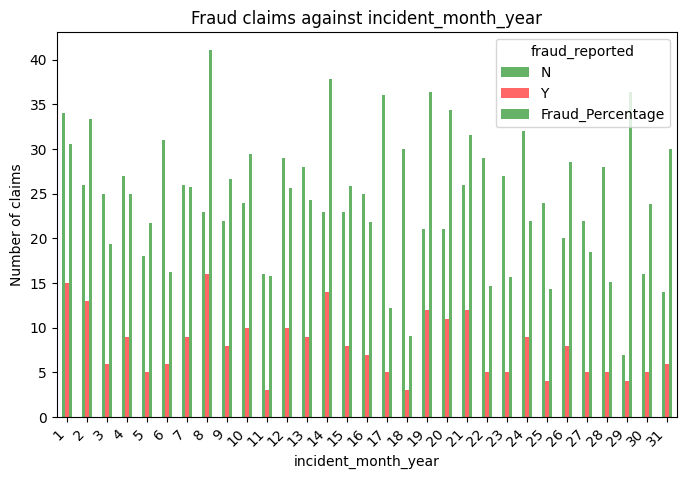

In [ ]:
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_date_only'] = df['incident_date'].dt.day
fraud_counts = df.groupby(['incident_date_only', 'fraud_reported']).size().unstack(fill_value=0)
print(fraud_counts)
print('-'*100)
fraud_counts['Fraud_Percentage'] = (fraud_counts['Y'] / (fraud_counts['N'] + fraud_counts['Y'])) * 100
print(fraud_counts[['Fraud_Percentage']])

plt.figure(figsize=(10, 6))
fraud_counts.plot(kind='bar', figsize=(8, 5), color=['green', 'red'], alpha=0.6)

plt.title('Fraud claims against incident_month_year')
plt.xlabel('incident_month_year')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of claims')
plt.legend(title='fraud_reported')
plt.show()

df = df.drop(['incident_date_only'], axis=1)

Fraud rate remains fairly peaked on the 8th of the month.

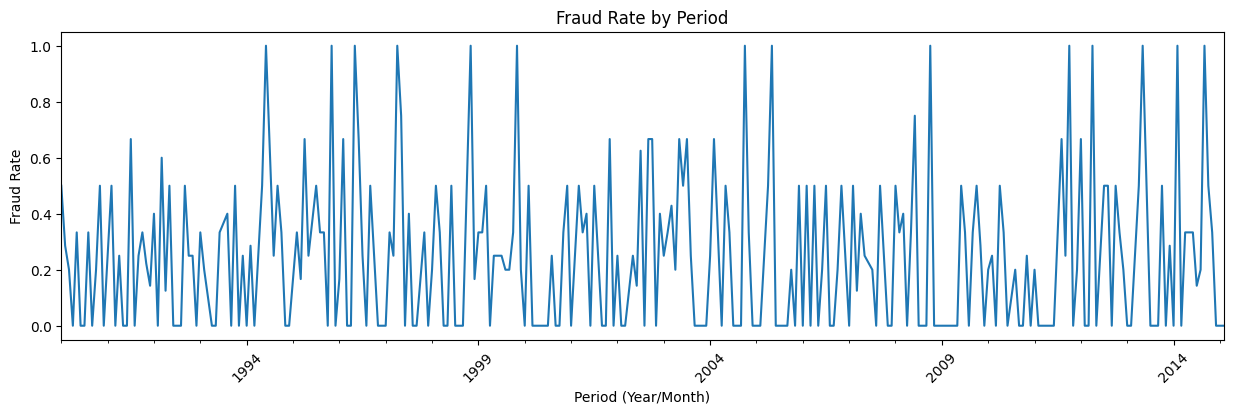

In [ ]:
# Visualize fraud rate over time based on policy_bind_date
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['policy_month_year'] = df['policy_bind_date'].dt.to_period('M')  # Group by month-year

fraud_analysis = df.groupby(['policy_month_year', 'fraud_reported']).size().unstack(fill_value=0)
fraud_rate = fraud_analysis['Y'] / (fraud_analysis['Y'] + fraud_analysis['N'])

plt.figure(figsize=(15, 4))
fraud_rate.plot(kind='line', title='Fraud Rate by Period')
plt.xlabel('Period (Year/Month)')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

The fraud rate fluctuates significantly across different policy_bind periods.
This suggests that fraud occurrences are inconsistent over time, potentially influenced by external factors.

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported',
       'incident_minus_policy_bind_date', 'age_range',
       'months_as_customer_range', 'policy_month_year'],
      dtype='object')

In [ ]:
# Reasons for dropping the respective columns
# policy_number: is just a unique idenitifier to assigned to each policyholder
# policy_bind_date: has no significance to the date alone
# incident_date: has no significance to the date alone
# incident_location: insured_zip is a good enough indicator which is more interpretable
# df = df.drop(['policy_number','policy_bind_date', 'incident_date','incident_location', 'policy_month_year', 'long_lat'], axis = 1)

df = df.drop(['policy_number','policy_bind_date', 'incident_date','incident_location', 'policy_month_year'], axis = 1)

In [ ]:
# remove columns where we created groups for

df = df.drop(['age', 'months_as_customer'], axis = 1)

#Feature Engineering

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Trivial Damage', 'Minor Damage', 'Major Damage', 'Total Loss']])

# Fit and transform the 'incident_severity' column
df['incident_severity_encoded'] = encoder.fit_transform(df[['incident_severity']])

df = df.drop(['incident_severity'], axis = 1)

In [ ]:
quantitative_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

for column in categorical_cols:
    unique_values = df[column].unique()
    print(f"Unique '{column}': {unique_values}")
print('-'*100)
for column in quantitative_cols:
    max_values = df[column].max()
    min_values = df[column].min()
    print(f"Column '{column}': Min = {min_values}, Max = {max_values}")

Unique 'policy_state': ['OH' 'IN' 'IL']
Unique 'policy_csl': ['250/500' '100/300' '500/1000']
Unique 'insured_sex': ['MALE' 'FEMALE']
Unique 'insured_education_level': ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
Unique 'insured_occupation': ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
Unique 'insured_hobbies': ['others' 'chess' 'cross-fit']
Unique 'insured_relationship': ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
Unique 'incident_type': ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
Unique 'collision_type': ['Side Collision' 'Rear Collision' 'Front Collision']
Unique 'authorities_contacted': ['Police' 'Other' 'Fire' 'Ambulance']
Unique 'incident_state': ['SC' 'VA' 'NY' 'OH' 'WV' 'NC' 'PA']
Unique 'incident_c

In [ ]:
# Pick out columns with many unique values for Target encoding
target_encoding_col = ['insured_occupation', 'auto_make', 'auto_model']

one_hot_col = [col for col in categorical_cols if col not in target_encoding_col and col != 'fraud_reported' and col != 'incident_severity_encoded']

In [ ]:
# Target encoding
encoder = TargetEncoder()
for col in target_encoding_col:
  df[col] = encoder.fit_transform(df[col], df['fraud_reported'])

In [ ]:
print(one_hot_col)

['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'age_range', 'months_as_customer_range']


In [ ]:
df_encoded = pd.get_dummies(df, columns=one_hot_col, drop_first=True)

In [ ]:
df_encoded['fraud_reported'] = df_encoded['fraud_reported'].apply(lambda x: 1 if x == 'Y' else 0)

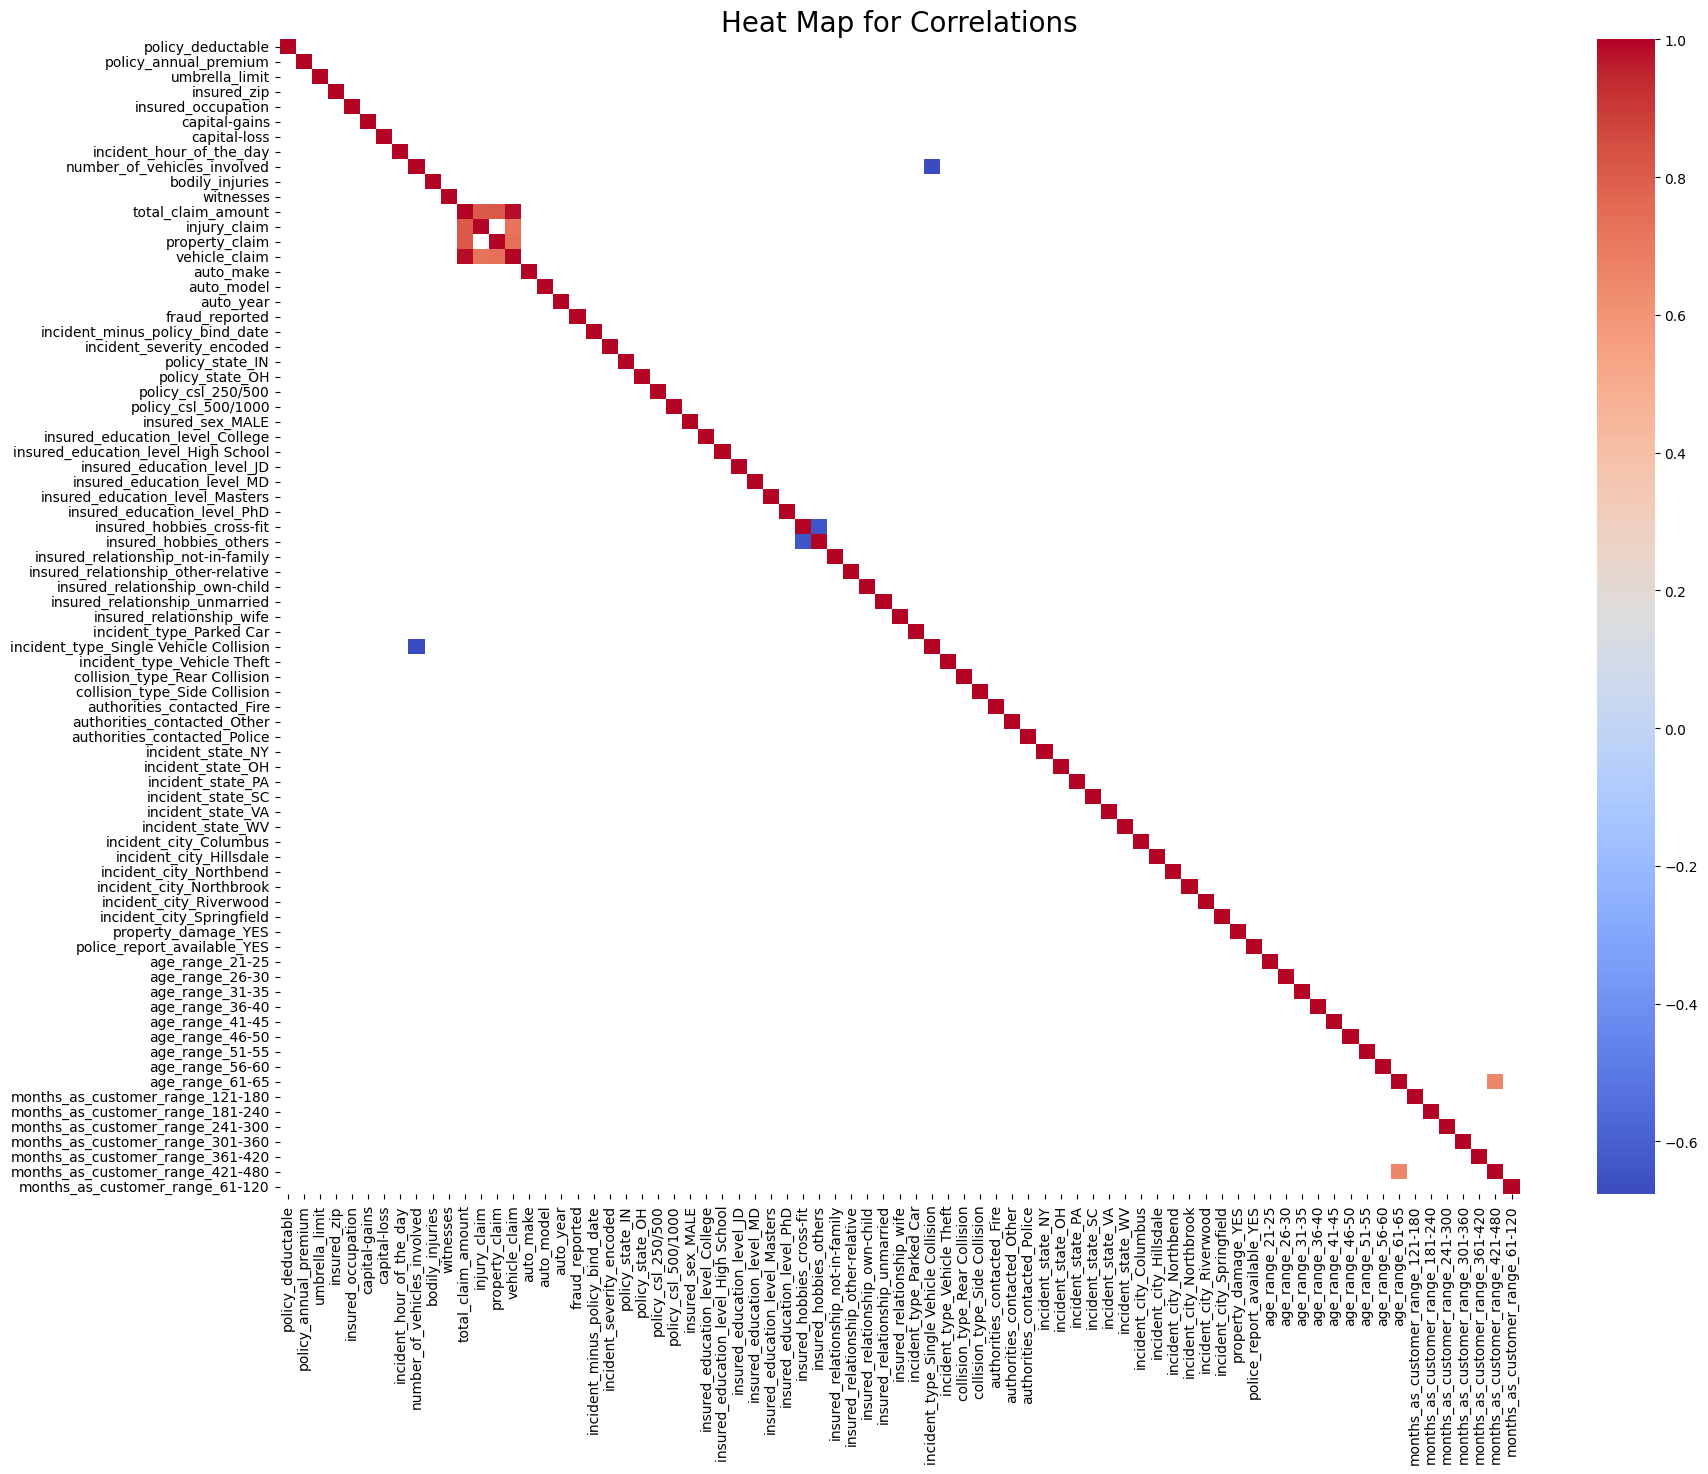

In [ ]:
# Correlation map
corr_matrix = df_encoded.corr()
threshold = 0.6
corr_matrix[(corr_matrix.abs() < threshold)] = np.nan

# Plot the heatmap with a larger figure size
plt.rcParams['figure.figsize'] = (20, 15)
sns.heatmap(corr_matrix, cmap = 'coolwarm')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

We can see that injury_claim, vehicle_claim and property_claim is highly correlated to total_claim_amount. It may be due to the fact that total_claim_amount is the sum of injury_claim + vehicle_claim + property_claim.

In [ ]:
# To confirm our suspicions
df['is_total_claim_correct'] = (df['total_claim_amount'] == df['vehicle_claim'] + df['injury_claim'] + df['property_claim'])
incorrect_claims = df[df['is_total_claim_correct'] == False]
print(f"Number of incorrect rows: {len(incorrect_claims)}")
df = df.drop(['is_total_claim_correct'], axis = 1)

Number of incorrect rows: 0


In [ ]:
# Drop vehicle_claim, property_claim and injury_claim as total_claim_amount has already captured the necessary information
df = df.drop(['vehicle_claim', 'property_claim', 'injury_claim'], axis = 1)

In [ ]:
# Split into train and test set
X = df_encoded.drop(['fraud_reported'], axis=1)
y = df_encoded['fraud_reported']
# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 8)

In [ ]:
X_train.columns

Index(['policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_occupation', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'incident_minus_policy_bind_date',
       'incident_severity_encoded', 'policy_state_IN', 'policy_state_OH',
       'policy_csl_250/500', 'policy_csl_500/1000', 'insured_sex_MALE',
       'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_hobbies_cross-fit',
       'insured_hobbies_others', 'insured_relationship_not-in-family',
       'insured_relationship_other-relative', 'insured_relationship_own-child',
       'insured_relationship_un

In [ ]:
# save new df to drive (no need to run, check below)
# file_path = '/content/drive/My Drive/new_df.csv'
# df_encoded.to_csv(file_path, index=False)

# Baseline model 1


In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


X = new_df.drop(columns=['fraud_reported'], axis=1)
y = new_df['fraud_reported'].round().astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2 )

xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Plot confus


Accuracy: 0.8200
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       145
           1       0.71      0.58      0.64        55

    accuracy                           0.82       200
   macro avg       0.78      0.75      0.76       200
weighted avg       0.81      0.82      0.81       200



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:53:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Feature Importance Scores:
                               Feature  Importance
19           incident_severity_encoded    0.125569
32              insured_hobbies_others    0.096024
30         insured_education_level_PhD    0.057797
55            incident_city_Northbrook    0.043930
33  insured_relationship_not-in-family    0.034033
..                                 ...         ...
62                     age_range_31-35    0.000000
67                     age_range_56-60    0.000000
66                     age_range_51-55    0.000000
73    months_as_customer_range_361-420    0.000000
72    months_as_customer_range_301-360    0.000000

[76 rows x 2 columns]


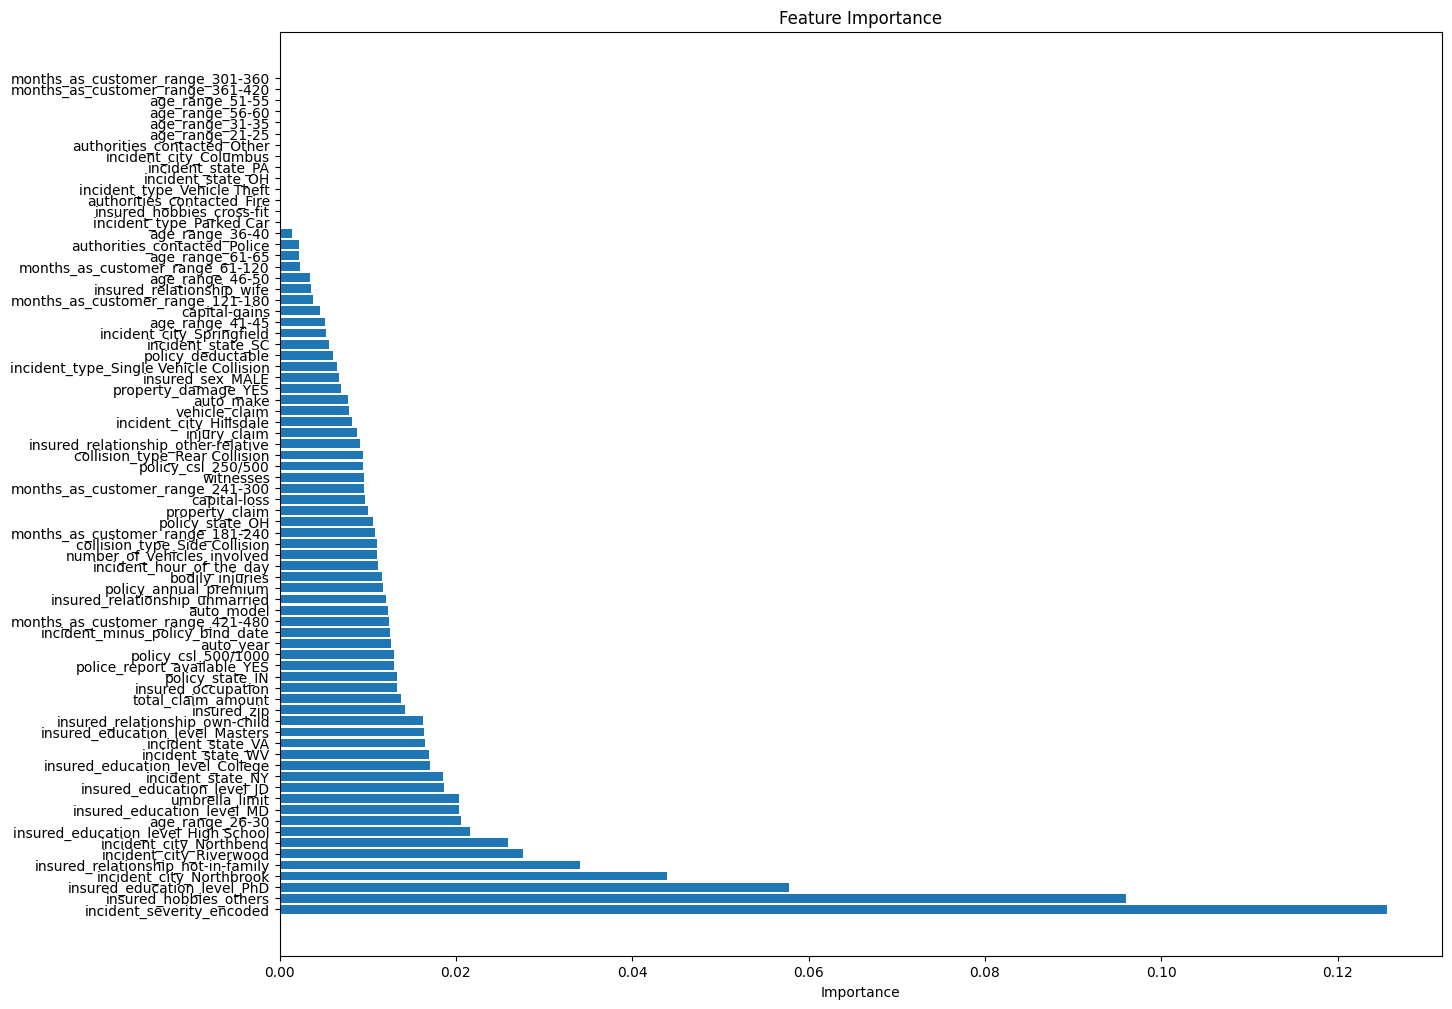

In [ ]:
import matplotlib.pyplot as plt

# Extract feature importance scores
feature_importances = xgb_clf.feature_importances_

# Create a DataFrame for better visualization
import pandas as pd
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance Scores:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(15, 12))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# Challenger model 2


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report


X = new_df.drop(columns=['fraud_reported'])
y = new_df['fraud_reported'].round().astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

dtc = DecisionTreeClassifier(random_state=8)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")
print(f"AUC-ROC score of Decision Tree is: {roc_auc_score(y_test, y_pred)}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.74
AUC-ROC score of Decision Tree is: 0.6486011623192324
[[125  26]
 [ 26  23]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       151
           1       0.47      0.47      0.47        49

    accuracy                           0.74       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.74      0.74      0.74       200



In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = new_df.drop(columns=['fraud_reported'])
y = new_df['fraud_reported'].round().astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

forest = RandomForestClassifier(random_state=8)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

In [ ]:
y_pred = forest.predict(X_test)

rand_clf_train_acc = accuracy_score(y_train,forest.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")
print(f"AUC-ROC score of Random Forest is: {roc_auc_score(y_test, y_pred)}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 1.0
Test accuracy of Random Forest is : 0.77
AUC-ROC score of Random Forest is: 0.5857548317340181
[[143   8]
 [ 38  11]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       151
           1       0.58      0.22      0.32        49

    accuracy                           0.77       200
   macro avg       0.68      0.59      0.59       200
weighted avg       0.74      0.77      0.73       200



In [ ]:
features = forest.feature_importances_
print(features)

[0.01055127 0.04745623 0.01139253 0.03970851 0.02759369 0.02215443
 0.02364948 0.02491009 0.00642299 0.01123645 0.01450156 0.04048969
 0.04146041 0.04440091 0.04314749 0.02828617 0.04805732 0.02622544
 0.03916045 0.09071699 0.00513458 0.00580468 0.00595474 0.00450765
 0.00641963 0.00359565 0.00503346 0.00618183 0.00428475 0.00417903
 0.00476705 0.02558195 0.08500135 0.00489074 0.00446596 0.00556614
 0.00558681 0.00319435 0.0017312  0.00596112 0.00194092 0.00593951
 0.00470927 0.00465598 0.00484909 0.004581   0.00481926 0.00449885
 0.00229633 0.00918738 0.0044739  0.00653896 0.004395   0.00541572
 0.00475272 0.00351761 0.00405504 0.00447498 0.00584856 0.00640667
 0.00219196 0.00404932 0.00456114 0.00551859 0.00501571 0.00386336
 0.00279615 0.00323975 0.0026595  0.00412438 0.00591518 0.00450783
 0.00448109 0.00224    0.00295678 0.00515773]


**Feature importance based on mean decrease in impurity**


Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time: {elapsed_time} seconds")

Elapsed time: 0.020538806915283203 seconds


incident_severity_encoded           0.090717
insured_hobbies_others              0.085001
auto_model                          0.048057
policy_annual_premium               0.047456
property_claim                      0.044401
                                      ...   
incident_state_PA                   0.002296
months_as_customer_range_361-420    0.002240
age_range_21-25                     0.002192
incident_type_Vehicle Theft         0.001941
incident_type_Parked Car            0.001731
Length: 76, dtype: float64


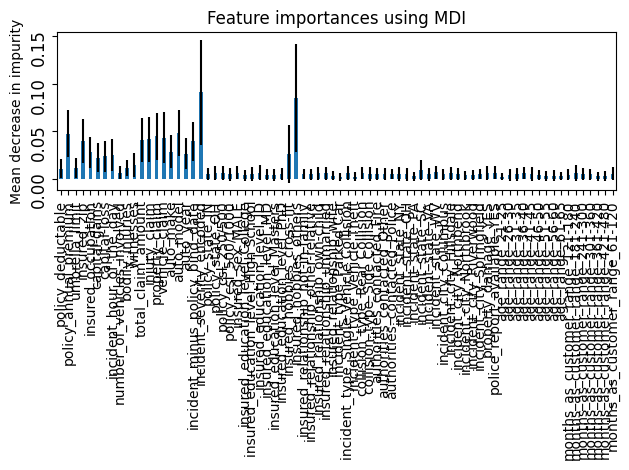

In [ ]:
feature_names = new_df.columns.tolist()
feature_names.remove('fraud_reported')
forest_importances = pd.Series(importances, index=feature_names)

feature_scores = pd.Series(forest.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
plt.yticks(rotation=90,fontsize=12)
fig.tight_layout()

In [ ]:
# Remove features with low importance (e.g., < 0.05)
indices = np.argsort(importances)[::-1]
important_features = [feature_names[i] for i in indices if importances[i] > 0.05]
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]

# Re-train the Random Forest using only selected features
forest.fit(X_train_filtered, y_train)

# Get probability scores (for AUC-ROC evaluation)
y_test_proba = forest.predict_proba(X_test_filtered)[:, 1]

y_test_pred = forest.predict(X_test_filtered)


In [ ]:
y_train_pred = forest.predict(X_train_filtered)

rand_clf_train_acc = accuracy_score(y_train,y_train_pred)
rand_clf_test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

auc_roc = roc_auc_score(y_test, y_test_proba)
print("Test AUC-ROC Score:", auc_roc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.85625
Test accuracy of Random Forest is : 0.845
Test AUC-ROC Score: 0.8387619948641708
[[143   8]
 [ 38  11]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       151
           1       0.58      0.22      0.32        49

    accuracy                           0.77       200
   macro avg       0.68      0.59      0.59       200
weighted avg       0.74      0.77      0.73       200





**Feature importance based on feature permutation**


Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [ ]:
from sklearn.inspection import permutation_importance

forest.fit(X_train, y_train)

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 14.430 seconds


insured_hobbies_others              0.0270
incident_severity_encoded           0.0250
insured_occupation                  0.0115
auto_model                          0.0095
policy_annual_premium               0.0080
                                     ...  
incident_city_Northbrook           -0.0005
age_range_31-35                    -0.0005
umbrella_limit                     -0.0010
months_as_customer_range_421-480   -0.0010
incident_hour_of_the_day           -0.0030
Length: 76, dtype: float64


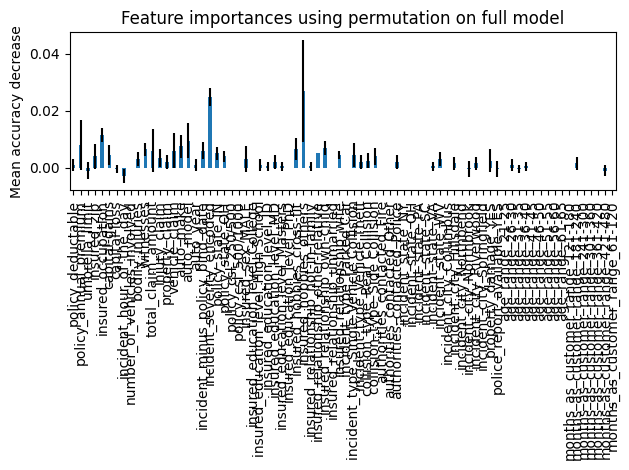

In [ ]:
feature_scores = pd.Series(forest_importances, index=X_train.columns).sort_values(ascending=False)

print(feature_scores)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Once again, we can see that insured_hobbies and incident_severity are the most important features, however based on permutation, insured_hobbies is more important than incident_severity.

In [ ]:
# Remove features with low importance (e.g., < 0.0)
indices = np.argsort(importances)[::-1]
important_features = [feature_names[i] for i in indices if importances[i] > 0.0]
X_train_filtered = X_train[important_features]
X_test_filtered = X_test[important_features]


# Re-train the Random Forest using only selected features
forest.fit(X_train_filtered, y_train)

# Get probability scores (for AUC-ROC evaluation)
y_test_proba = forest.predict_proba(X_test_filtered)[:, 1]

y_test_pred = forest.predict(X_test_filtered)


In [ ]:
y_train_pred = forest.predict(X_train_filtered)

rand_clf_train_acc = accuracy_score(y_train,y_train_pred)
rand_clf_test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

auc_roc = roc_auc_score(y_test, y_test_proba)
print("Test AUC-ROC Score:", auc_roc)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 1.0
Test accuracy of Random Forest is : 0.76
Test AUC-ROC Score: 0.7757805108798488
[[125  26]
 [ 26  23]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       151
           1       0.47      0.47      0.47        49

    accuracy                           0.74       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.74      0.74      0.74       200



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [5, 10, None],
    'min_samples_split': randint(2, 10),
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_dist, n_iter=50, cv=5, scoring='f1', n_jobs=-1, random_state=42)
random_search.fit(X_train_filtered, y_train)

print("Best Parameters:", random_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 6, 'n_estimators': 73}


In [ ]:
best_forest = random_search.best_estimator_
best_forest.fit(X_train_filtered, y_train)

y_test_pred = best_forest.predict(X_test_filtered)
y_test_proba = best_forest.predict_proba(X_test_filtered)[:, 1]

y_train_pred = forest.predict(X_train_filtered)

rand_clf_train_acc = accuracy_score(y_train,y_train_pred)
rand_clf_test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

auc_roc = roc_auc_score(y_test, y_test_proba)
print("Test AUC-ROC Score:", auc_roc)

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Training accuracy of Random Forest is : 1.0
Test accuracy of Random Forest is : 0.77
Test AUC-ROC Score: 0.793350452763887
[[144   7]
 [ 39  10]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       151
           1       0.59      0.20      0.30        49

    accuracy                           0.77       200
   macro avg       0.69      0.58      0.58       200
weighted avg       0.74      0.77      0.73       200



# Challenger Model 3
TabPFN (Tabular Prior-data Fitted Networks)
*   Source: https://arxiv.org/abs/2207.01848
*   Transformer-based model designed specifically for tabular data with speed
*   Provides some interpretability to explain fraud prediction, but less transparent compared to traditional methods like XGBoost and RandomForest
*   more likely to perform better and faster than the other 2 methods with a larger dataset








In [ ]:
# !pip install tabpfn
import pandas as pd
import matplotlib.pyplot as plt
from tabpfn import TabPFNClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score

In [ ]:
X = new_df.drop(columns=['fraud_reported', 'age'])
y = new_df['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# print(y_test.value_counts())

In [ ]:
model = TabPFNClassifier(device='cpu')
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Calculate AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")

# Hyperparameter tuning


In [ ]:
print(xgb_clf.get_params())


In [ ]:
# Grid Search for exhaustive searching which is computationally expensive
'''
XGBoost Hyperparameters

Tree-Based
- max_depth
- min_child_weight
- gamma

Boosting parameters
- learning rate
- n_estimators

Regularisation penalty
- subsample
- colsameple_bytree
- lambda, alpha
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 300, 500],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

# Train best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred))

# Ensemble Model

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, roc_curve, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVC

from xgboost import XGBClassifier

from scipy.spatial.distance import cdist, pdist

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_id = '1qJ-m_19hyk0K1ikZtjd3Fv7JqwTFOKKI'
url = f'https://drive.google.com/uc?export=view&id={file_id}'
df = pd.read_csv(url)

## Ensemble of Models

### Data Preparation

In [ ]:
target_col = "fraud_reported"

X = df.drop(columns=[target_col])
y = df[target_col].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

### Over and Under Sampling

In [ ]:
over = SMOTE(sampling_strategy=0.5, random_state=42)   # minority becomes 0.5 * majority (~800 * 0.75)
under = RandomUnderSampler(sampling_strategy=1.0, random_state=42)  # majority becomes equal to minority

resample_pipeline = Pipeline(steps=[
    ('o', over),
    ('u', under)
])

X_resampled, y_resampled = resample_pipeline.fit_resample(X_train, y_train)

print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_resampled))

### Training of Models

Models will be used for stacked ensemble method
1.   Random Forest
2.   Gradient Boosting
3.   XGBoost



In [ ]:
### 1: Random Forest ###
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=rf_params,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

rf_search.fit(X_resampled, y_resampled)
best_rf = rf_search.best_estimator_
print(best_rf)

y_pred = best_rf.predict(X_test)
rand_clf_train_acc = accuracy_score(y_resampled,best_rf.predict(X_resampled))
rand_clf_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
### 2: Gradient Boosting ###

gb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

gb_search = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=gb_params,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

gb_search.fit(X_resampled, y_resampled)
best_gb = gb_search.best_estimator_
print(best_gb)

y_pred = best_gb.predict(X_test)
gb_train_acc = accuracy_score(y_resampled,best_gb.predict(X_resampled))
gb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Grad Boosting is : {gb_train_acc}")
print(f"Test accuracy of Grad Boosting is : {gb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
### 3: XGBoost ###

xgb_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_search = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss',),
    param_distributions=xgb_params,
    n_iter=10,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

xgb_search.fit(X_resampled, y_resampled)
best_xgb = xgb_search.best_estimator_
print(best_xgb)

y_pred = best_xgb.predict(X_test)
xgb_train_acc = accuracy_score(y_resampled,best_xgb.predict(X_resampled))
xgb_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XGBoost is : {xgb_train_acc}")
print(f"Test accuracy of XGBoost is : {xgb_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

### Building out ensemble stack

In [ ]:
estimators = [
    ('rf', best_rf),
    ('gb', best_gb),
    ('xgb', best_xgb)
]

svm_params = {
    'final_estimator__C': [0.1, 1, 5],
    'final_estimator__kernel': ['linear', 'rbf'],  # linear is usually better for stacking, but let's test
    'final_estimator__gamma': ['scale', 'auto']    # only used for 'rbf', harmless for 'linear'
}

meta_learner = SVC(kernel='linear', probability=True, random_state=42)

stacked_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_learner,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    stack_method = 'predict_proba',
    n_jobs=-1
)

stacked_clf = GridSearchCV(
    estimator=stacked_clf,
    param_grid=svm_params,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=2
)

stacked_clf.fit(X_resampled, y_resampled) # keep consistent data used in all models - either use all resample or all the same

In [ ]:
### Running and evaluation ###

stacked_clf = stacked_clf.best_estimator_

y_pred = stacked_clf.predict(X_test)
y_prob = stacked_clf.predict_proba(X_test)[:, 1]

print("Classification Report:")
print(classification_report(y_test, y_pred))
auc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score: {:.4f}".format(auc_score))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Ensemble is : {accuracy}")

In [ ]:
### Eval Vis for ROC Curve ###
plt.figure(figsize=(10, 6))
for name, model in estimators:
    model.fit(X_resampled, y_resampled)
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=name)

y_prob = stacked_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='Stacked', linewidth=3)

plt.legend()
plt.title("ROC Curves - Base models vs Ensemble")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(True)
plt.show()

## Ensemble Model with Similarity Matching

### Preparation: Grabbing top_n features by incident state

In [ ]:
df_corr = df.copy()
bool_cols = df_corr.select_dtypes(include='bool').columns
df_corr[bool_cols] = df_corr[bool_cols].astype(int)

target_col = "fraud_reported"
incident_state_cols = [col for col in df_corr.columns if col.startswith("incident_state_")]
feature_cols = [col for col in df_corr.columns if col != target_col and col not in incident_state_cols]

top_features_per_state = {}
top_n = 10  # toggleable/ refinable

for state_col in incident_state_cols:
    subset = df_corr[df_corr[state_col] == 1]

    if len(subset) < 20: #adjustable, for now all data points are kept (min is 23)
        continue  # skip small groups

    corr = subset[feature_cols + [target_col]].corr(numeric_only=True)

    # Defensive check
    if target_col not in corr.columns:
        continue

    top_corr = corr[target_col].drop(target_col).abs().sort_values(ascending=False).head(top_n)
    top_features_per_state[state_col] = top_corr.index.tolist()

# Preview results
for state, features in top_features_per_state.items():
    print(f"{state}: {features}")


### Visualisation of logic

1. If the distribution of fraud vs non-fraud by state is significantly different, that state's insurance reports can be considered for similarity matching
2. We look at distribution of distances from a fraud datapoint to non fraud/ fraud by the top 10 features
3. If the 5th percentils distributions are different enough (can be refined further), we can use it as a proxy for predicting fraud (by matching to a fraudulent/ non-fraudulent pattern)

In [ ]:
distance_thresholds = {}

for state, top_features in top_features_per_state.items():
    subset = df_corr[df_corr[state] == 1]

    if len(subset) < 20: # same as above, can adjust to be stricter
        print(f"Skipping {state} due to low sample size")
        continue

    X = subset[top_features]
    y = subset['fraud_reported']

    # scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # separarte non fraud and fraud
    X_fraud = X_scaled[y == 1]
    X_nonfraud = X_scaled[y == 0]

    if len(X_fraud) < 5 or len(X_nonfraud) < 5: # we assume we use n_neighbors = 5, hence if < 5 just ignore the state
        print(f"Skipping {state} due to insufficient fraud/non-fraud")
        continue

    # distance computation
    fraud_to_nonfraud = cdist(X_fraud, X_nonfraud, metric='euclidean').flatten()
    fraud_to_fraud = pdist(X_fraud, metric='euclidean')

    # 5th percentiles
    p5_f2nf = np.percentile(fraud_to_nonfraud, 5)
    p5_f2f = np.percentile(fraud_to_fraud, 5)
    margin = p5_f2nf - p5_f2f

    distance_thresholds[state] = {
        'fraud_to_nonfraud_5pct': p5_f2nf,
        'fraud_to_fraud_5pct': p5_f2f,
        '5pct_margin': margin
    }

    # Plot
    plt.figure(figsize=(10, 5))
    sns.histplot(fraud_to_nonfraud, bins=40, color='red', label='Fraud → Non-Fraud', stat='density', alpha=0.6)
    sns.histplot(fraud_to_fraud, bins=40, color='green', label='Fraud → Fraud', stat='density', alpha=0.6)

    plt.axvline(p5_f2nf, color='red', linestyle='--', label='Non-Fraud 5%')
    plt.axvline(p5_f2f, color='green', linestyle='--', label='Fraud 5%')

    plt.title(f"[{state}] Distance Distributions\n5th Percentile Margin: {margin:.2f}")
    plt.xlabel("Euclidean Distance")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()


### Preparation for pipeline

In [ ]:
def predict_with_similarity_or_ensemble(input_vector, input_dict, ensemble_model, default_prob=None):
    active_state = next((k for k, v in input_dict.items() if k.startswith("incident_state_") and v == 1), None)

    if active_state not in state_models:
        # Fallback to ensemble model
        return ensemble_model.predict([input_vector])[0], 0, 0

    model = state_models[active_state]
    top_feats = model["features"]
    threshold = model["threshold"]

    # Extract only the relevant top features for this state
    input_feats = np.array([input_dict[feat] for feat in top_feats]).reshape(1, -1)
    input_scaled = model["scaler"].transform(input_feats)

    # Get distance to nearest 5 fraud cases
    distances, indices = model["knn"].kneighbors(input_scaled, n_neighbors=5)
    neighbor_labels = model["labels"][indices[0]]  # grab their original labels
    fraud_ratio = np.mean(neighbor_labels)

    if distances[0][4] < threshold and fraud_ratio >  0.4:
        majority_vote = Counter(neighbor_labels).most_common(1)[0][0]
        return majority_vote, 1, fraud_ratio
    elif distances[0][4] < threshold and fraud_ratio <=  0.4:
        majority_vote = Counter(neighbor_labels).most_common(1)[0][0]
        return majority_vote, 1, fraud_ratio
    else:
        return ensemble_model.predict([input_vector])[0], 0, 0


In [ ]:
state_models = {}

for state, top_features in top_features_per_state.items():
    margin = distance_thresholds[state]['5pct_margin']
    if margin <= 0.5:
        continue

    subset = df_corr[df_corr[state] == 1]
    X = subset[top_features]
    y = subset['fraud_reported']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    knn = NearestNeighbors(n_neighbors=5)
    knn.fit(X_scaled)  # 🔁 Use all samples (not just fraud)

    state_models[state] = {
        "features": top_features,
        "scaler": scaler,
        "knn": knn,
        "threshold": (
            distance_thresholds[state]['fraud_to_nonfraud_5pct'] +
            distance_thresholds[state]['fraud_to_fraud_5pct']
        ) / 2,
        "labels": y.values  # 🔁 Use all labels
    }


In [ ]:
df_raw = df.copy()  # assuming this includes the full, unscaled, unprocessed DataFrame
X_raw = df_raw.drop(columns=['fraud_reported'])

X_raw_train, X_raw_test = train_test_split(
    X_raw, test_size=0.2, random_state=42, stratify=df['fraud_reported']
)

### Running and evaluating model

In [ ]:
import warnings

final_preds = []
final_probs = []
used_similarity_flags = []
sim_preds, sim_true, sim_proba = [], [], []
ens_preds, ens_true = [], []

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in range(len(X_test)):
        input_vector = X_test[i]
        input_dict = X_raw_test.iloc[i].to_dict()
        true_label = y_test[i]

        pred, used_similarity, sim_prob = predict_with_similarity_or_ensemble(
            input_vector=input_vector,
            input_dict=input_dict,
            ensemble_model=stacked_clf
        )

        final_preds.append(pred)
        used_similarity_flags.append(used_similarity)

        if used_similarity:
            sim_preds.append(pred)
            sim_true.append(true_label)
            final_probs.append(sim_prob)
            sim_proba.append(sim_prob)
        else:
            ens_preds.append(pred)
            ens_true.append(true_label)
            final_probs.append(stacked_clf.predict_proba([input_vector])[0][1])

# --- Evaluation ---
print("Overall Classification Report (Hybrid System):")
print(f"Similarity-based predictions used: {sum(used_similarity_flags)} / {len(X_test)}")
print(classification_report(y_test, final_preds))
print(f"Accuracy: {accuracy_score(y_test, final_preds):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, final_probs):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, final_preds))

if sim_preds:
    print("\nSimilarity-Based Predictions Only:")
    print(f"Count: {len(sim_preds)}")
    print(classification_report(sim_true, sim_preds))
    print(f"Accuracy: {accuracy_score(sim_true, sim_preds):.4f}")
    print(f"ROC-AUC: {roc_auc_score(sim_true, sim_proba):.4f}")
    print(confusion_matrix(sim_true, sim_preds))
else:
    print("\nNo similarity-based predictions were used.")
